In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 50.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 65.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 112.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 47.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/499_Project/Test/Datasets/train_400.csv',index_col=False, encoding='iso-8859-1', 
                                warn_bad_lines=True, error_bad_lines=False)

df2 = pd.read_csv('/content/drive/MyDrive/499_Project/Test/Datasets/test_100.csv',index_col=False, encoding='iso-8859-1', 
                                warn_bad_lines=True, error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
print(df1.head())
print(df2.head())

                                                text  \
0  I stuck a pin through a carrot. When I pulled ...   
1  John couldn't see the stage with Billy in fron...   
2  The police arrested all of the gang members. T...   
3  I couldn't put the pot on the shelf because it...   
4  We had hoped to place copies of our newsletter...   

                                              text.1  label  
0                             The carrot had a hole.      1  
1                                  John is so short.      1  
2  The police were trying to stop the drug trade ...      1  
3                              The pot was too tall.      1  
4  There were simply not enough copies of the new...      1  
                                                text  \
0  I stuck a pin through a carrot. When I pulled ...   
1  John couldn't see the stage with Billy in fron...   
2  The police arrested all of the gang members. T...   
3  I couldn't put the pot on the shelf because it...   
4  We had h

In [ ]:
df1.label[df1.label == 1]="TRUE"
df1.label[df1.label == 0]="FALSE"

df2.label[df2.label == 1]="TRUE"
df2.label[df2.label == 0]="FALSE"

# taking acceptable and deleting unacceptable
df3 = df1[~df1.label.str.contains('TRUE')]
df3 = df3.sample(n=200, replace=True)
df3["label"].value_counts()


# taking acceptable and deleting unacceptable
df4 = df1[~df1.label.str.contains('FALSE')]
df4 = df4.sample(n=200, replace=True)
df4["label"].value_counts()



<ipython-input-7-12d0522a05e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.label[df1.label == 1]="TRUE"
<ipython-input-7-12d0522a05e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.label[df2.label == 1]="TRUE"


TRUE    200
Name: label, dtype: int64

In [ ]:
frames = [df3, df4]

temp = pd.concat(frames)

temp["label"].value_counts()

FALSE    200
TRUE     200
Name: label, dtype: int64

In [ ]:
# taking acceptable and deleting unacceptable
df5 = df2[~df2.label.str.contains('TRUE')]
df5 = df5.sample(n=50, replace=True)
df5["label"].value_counts()


# taking acceptable and deleting unacceptable
df6 = df2[~df2.label.str.contains('FALSE')]
df6 = df6.sample(n=50, replace=True)
df6["label"].value_counts()




TRUE    50
Name: label, dtype: int64

In [ ]:
frames2 = [df5, df6]

temp2 = pd.concat(frames2)

temp2["label"].value_counts()


frames3 = [df3, df4, df5, df6]

temp3 = pd.concat(frames3)

temp3["label"].value_counts()

FALSE    250
TRUE     250
Name: label, dtype: int64

In [ ]:
text1 = temp3['text']+temp3['text']
emotion= temp3['label'].tolist()
text=text1.values.tolist()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text , emotion, test_size=.2, random_state=42)

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

400
400
100
100


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-cased'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [ ]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 36
	95percentile : 79
	99percentile : 97


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 36
	95percentile : 74
	99percentile : 93


In [ ]:
model = t.get_classifier()

In [ ]:
model = t.get_classifier()
trainable_layers = []
non_trainable_layers = []

for i in range(3):
     layer = model.bert.encoder.layer[i]
     layer.trainable = True
     non_trainable_layers.append(i)

for i in range(3, 12):
     layer = model.bert.encoder.layer[i]
     layer.trainable = False
     trainable_layers.append(i)


num_trainable_layers = len(trainable_layers)
num_not_trainable_layers = len(non_trainable_layers)

print(f'The number of trainable layers in the model is: {num_trainable_layers}')
print(f'The trainable layers before freezing are: {trainable_layers}')
print(f'The number of non-trainable layers after freezing in the model is: {num_not_trainable_layers}')
print(f'The non-trainable layers are: {non_trainable_layers}')

The number of trainable layers in the model is: 9
The trainable layers before freezing are: [3, 4, 5, 6, 7, 8, 9, 10, 11]
The number of non-trainable layers after freezing in the model is: 3
The non-trainable layers are: [0, 1, 2]


In [ ]:
model = t.get_classifier()
trainable_layers = []
non_trainable_layers = []

for i in range(3,12):
     layer = model.bert.encoder.layer[i]
     layer.trainable = True
     trainable_layers.append(i)



print(f'The number of trainable layers in the model is: {len(trainable_layers)}')
print(f'The trainable layers after freezing are: {trainable_layers}')




The number of trainable layers in the model is: 9
The trainable layers after freezing are: [3, 4, 5, 6, 7, 8, 9, 10, 11]


In [ ]:
trainable_layer_weights = []
for i in trainable_layers:
    layer_weights = model.bert.encoder.layer[i].get_weights()
    trainable_layer_weights.append(layer_weights)

print(f'The number of trainable layers after weight extraction in the model is: {len(trainable_layer_weights)}')



The number of trainable layers after weight extraction in the model is: 9


In [ ]:
print(f'The trainable layer weights are: {trainable_layer_weights}')

The trainable layer weights are: [[array([[ 0.04076464, -0.01789101,  0.0063546 , ...,  0.12205233,
        -0.02610569,  0.06650475],
       [ 0.00297216,  0.01008251, -0.03552542, ..., -0.02324118,
         0.05598999, -0.05894605],
       [ 0.04933882,  0.00179559,  0.03876803, ...,  0.10913944,
         0.04290391,  0.02584006],
       ...,
       [-0.04473725, -0.0078492 ,  0.01184204, ..., -0.0366457 ,
         0.01239253,  0.02396374],
       [ 0.00179703,  0.02053568,  0.03309907, ..., -0.0165726 ,
        -0.00568313,  0.02019455],
       [ 0.00918879,  0.02016852, -0.05314023, ...,  0.06763934,
        -0.03472166,  0.028996  ]], dtype=float32), array([ 2.48220097e-02,  1.24777174e-02,  3.98773421e-03,  2.61459444e-02,
        1.01261691e-03,  8.18866398e-03,  5.87901734e-02,  2.13469062e-02,
       -9.70748812e-03, -7.88964424e-03, -1.32753514e-03,  4.28199545e-02,
       -3.09309140e-02, -1.91074461e-02,  1.18079940e-02, -4.54647802e-02,
       -1.09171038e-02,  1.17995432e

In [ ]:
import tensorflow as tf
from transformers import TFBertModel

# Load pre-trained BERT model
model = TFBertModel.from_pretrained("bert-base-cased")

# Get trainable and non-trainable layers
trainable_layers = list(range(3,12))
non_trainable_layers = list(range(12, 12 + 12))

# Extract weights from the trainable layers
trainable_layer_weights = []
for i in trainable_layers:
    layer_weights = model.bert.encoder.layer[i].get_weights()
    trainable_layer_weights.append(layer_weights)
    num_weights = [w.size for w in layer_weights]
    print(f"Layer {i} has {len(num_weights)} weight tensors:")
    for j, nw in enumerate(num_weights):
        print(f"  - Weight tensor {j} has {nw} elements")


print(f'The number of trainable layers after weight extraction in the model is: {len(trainable_layer_weights)}')



Layer 3 has 16 weight tensors:
  - Weight tensor 0 has 589824 elements
  - Weight tensor 1 has 768 elements
  - Weight tensor 2 has 589824 elements
  - Weight tensor 3 has 768 elements
  - Weight tensor 4 has 589824 elements
  - Weight tensor 5 has 768 elements
  - Weight tensor 6 has 589824 elements
  - Weight tensor 7 has 768 elements
  - Weight tensor 8 has 768 elements
  - Weight tensor 9 has 768 elements
  - Weight tensor 10 has 2359296 elements
  - Weight tensor 11 has 3072 elements
  - Weight tensor 12 has 2359296 elements
  - Weight tensor 13 has 768 elements
  - Weight tensor 14 has 768 elements
  - Weight tensor 15 has 768 elements
Layer 4 has 16 weight tensors:
  - Weight tensor 0 has 589824 elements
  - Weight tensor 1 has 768 elements
  - Weight tensor 2 has 589824 elements
  - Weight tensor 3 has 768 elements
  - Weight tensor 4 has 589824 elements
  - Weight tensor 5 has 768 elements
  - Weight tensor 6 has 589824 elements
  - Weight tensor 7 has 768 elements
  - Weight 

In [ ]:
for i in range(3,12):
    layer_weights = model.bert.encoder.layer[i].get_weights()
    num_neurons = layer_weights[0].shape[1]
    num_connections = layer_weights[0].shape[0] * layer_weights[0].shape[1]
    print(f"Layer {i}: {num_neurons} neurons, {num_connections} connections")


Layer 3: 768 neurons, 589824 connections
Layer 4: 768 neurons, 589824 connections
Layer 5: 768 neurons, 589824 connections
Layer 6: 768 neurons, 589824 connections
Layer 7: 768 neurons, 589824 connections
Layer 8: 768 neurons, 589824 connections
Layer 9: 768 neurons, 589824 connections
Layer 10: 768 neurons, 589824 connections
Layer 11: 768 neurons, 589824 connections


In [ ]:
model = t.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

In [ ]:
from transformers import BertModel

# Load the pre-trained BERT model
model = BertModel.from_pretrained('bert-base-cased')

# Print the size of the model
print(f"Size of the BERT model: {sum(p.numel() for p in model.parameters() if p.requires_grad) / 1e6:.2f} million parameters")


Size of the BERT model: 108.31 million parameters


In [ ]:
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from transformers import BertForSequenceClassification

# Load the model
model = BertForSequenceClassification.from_pretrained('bert-base-cased')

# Print the initial size of the model
print(f"Initial size of model: {sum(p.numel() for p in model.parameters())/ (1024*1024):.2f} MB")


Initial size of model: 103.29 MB


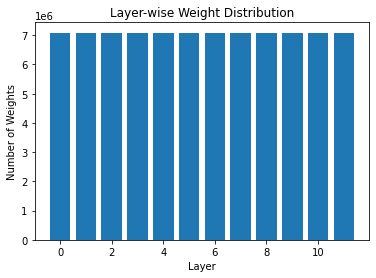

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import transformers

# Load pre-trained BERT model
model = transformers.TFBertModel.from_pretrained("bert-base-cased")

# Get layer-wise weight distribution
num_layers = len(model.bert.encoder.layer)
layer_weights_distribution = []
for i in range(num_layers):
    layer = model.bert.encoder.layer[i]
    layer_weights_flat = np.concatenate([weight.flatten() for weight in layer.get_weights()])
    layer_weights_distribution.append(layer_weights_flat)

# Plot layer-wise weight distribution
num_weights = [len(weights) for weights in layer_weights_distribution]
fig, ax = plt.subplots()
ax.bar(np.arange(num_layers), num_weights)
ax.set_xlabel('Layer')
ax.set_ylabel('Number of Weights')
ax.set_title('Layer-wise Weight Distribution')
plt.show()



Layer 1 weights: [-0.03350241  0.02402761 -0.02056437 ...  0.01418446 -0.03087093
 -0.04608136]
Number of weights in layer 1: 7087872

Layer 2 weights: [-0.05037006 -0.01347335 -0.0010524  ... -0.00911097 -0.03961443
 -0.08170161]
Number of weights in layer 2: 7087872

Layer 3 weights: [-0.01742433  0.01100861  0.03323944 ... -0.02573376 -0.00771071
 -0.07205378]
Number of weights in layer 3: 7087872

Layer 4 weights: [ 0.04076464 -0.01789101  0.0063546  ...  0.00380748 -0.01401904
 -0.07601727]
Number of weights in layer 4: 7087872

Layer 5 weights: [-0.03636299  0.03793161 -0.02122959 ... -0.02139576 -0.01054933
 -0.07140636]
Number of weights in layer 5: 7087872

Layer 6 weights: [-0.03996556  0.07398584  0.00595022 ... -0.00204528  0.00915252
 -0.07014331]
Number of weights in layer 6: 7087872

Layer 7 weights: [-0.00494472 -0.02346265  0.03896649 ... -0.02039336 -0.00298401
 -0.07874662]
Number of weights in layer 7: 7087872

Layer 8 weights: [-0.01487206 -0.02707485  0.02474511 .

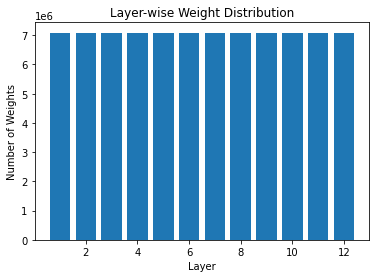

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import TFBertModel

# Load pre-trained BERT model
model = TFBertModel.from_pretrained("bert-base-cased")

# Get layer-wise weight distribution
num_layers = model.config.num_hidden_layers
layer_weights_distribution = []
num_weights = []
for i in range(num_layers):
    layer = model.bert.encoder.layer[i]
    layer_weights = layer.get_weights()
    layer_weights_flat = np.concatenate([weight.flatten() for weight in layer_weights])
    layer_weights_distribution.append(layer_weights_flat)
    num_weights.append(len(layer_weights_flat))

# Print weights and number of weights for each layer
for i in range(num_layers):
    print(f"Layer {i+1} weights: {layer_weights_distribution[i]}")
    print(f"Number of weights in layer {i+1}: {num_weights[i]}")
    print()

# Plot layer-wise weight distribution
fig, ax = plt.subplots()
ax.bar(np.arange(num_layers)+1, num_weights)
ax.set_xlabel('Layer')
ax.set_ylabel('Number of Weights')
ax.set_title('Layer-wise Weight Distribution')
plt.show()



Layer 1 weights: [-0.03350241  0.02402761 -0.02056437 ...  0.01418446 -0.03087093
 -0.04608136]
Number of weights in layer 1: 7087872

Layer 2 weights: [-0.05037006 -0.01347335 -0.0010524  ... -0.00911097 -0.03961443
 -0.08170161]
Number of weights in layer 2: 7087872

Layer 3 weights: [-0.01742433  0.01100861  0.03323944 ... -0.02573376 -0.00771071
 -0.07205378]
Number of weights in layer 3: 7087872

Layer 4 weights: [ 0.04076464 -0.01789101  0.0063546  ...  0.00380748 -0.01401904
 -0.07601727]
Number of weights in layer 4: 7087872

Layer 5 weights: [-0.03636299  0.03793161 -0.02122959 ... -0.02139576 -0.01054933
 -0.07140636]
Number of weights in layer 5: 7087872

Layer 6 weights: [-0.03996556  0.07398584  0.00595022 ... -0.00204528  0.00915252
 -0.07014331]
Number of weights in layer 6: 7087872

Layer 7 weights: [-0.00494472 -0.02346265  0.03896649 ... -0.02039336 -0.00298401
 -0.07874662]
Number of weights in layer 7: 7087872

Layer 8 weights: [-0.01487206 -0.02707485  0.02474511 .

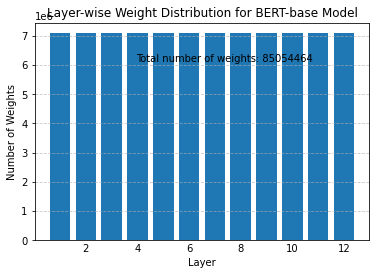

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import TFBertModel

# Load pre-trained BERT model
model = TFBertModel.from_pretrained("bert-base-cased")

# Get layer-wise weight distribution
num_layers = model.config.num_hidden_layers
layer_weights_distribution = []
num_weights = []
for i in range(num_layers):
    layer = model.bert.encoder.layer[i]
    layer_weights = layer.get_weights()
    layer_weights_flat = np.concatenate([weight.flatten() for weight in layer_weights])
    layer_weights_distribution.append(layer_weights_flat)
    num_weights.append(len(layer_weights_flat))

# Print weights and number of weights for each layer
for i in range(num_layers):
    print(f"Layer {i+1} weights: {layer_weights_distribution[i]}")
    print(f"Number of weights in layer {i+1}: {num_weights[i]}")
    print()

# Plot layer-wise weight distribution
fig, ax = plt.subplots()
ax.bar(np.arange(num_layers)+1, num_weights)
ax.set_xlabel('Layer')
ax.set_ylabel('Number of Weights')
ax.set_title('Layer-wise Weight Distribution for BERT-base Model')

# Additional information
ax.tick_params(axis='x', which='both', length=0)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.text(num_layers*0.9, max(num_weights)*0.9, f"Total number of weights: {sum(num_weights)}", fontsize=10, ha='right', va='top')

plt.show()


In [ ]:
import numpy as np
from scipy.spatial.distance import cosine
from transformers import TFBertModel

# Load pre-trained BERT model
model = TFBertModel.from_pretrained("bert-base-cased")

# Get layer-wise weight distribution
num_layers = model.config.num_hidden_layers
layer_weights_distribution = []
for i in range(num_layers):
    layer = model.bert.encoder.layer[i]
    layer_weights = layer.get_weights()
    layer_weights_flat = np.concatenate([weight.flatten() for weight in layer_weights])
    layer_weights_distribution.append(layer_weights_flat)

# Calculate Cosine distance between all pairs of layers
distances = np.zeros((num_layers, num_layers))
for i in range(num_layers):
    for j in range(num_layers):
        distances[i][j] = cosine(layer_weights_distribution[i], layer_weights_distribution[j])

# Print the distances
for i in range(num_layers):
    for j in range(num_layers):
        print(f"Cosine distance between layer {i+1} and layer {j+1}: {distances[i][j]}")


Cosine distance between layer 1 and layer 1: 0.0
Cosine distance between layer 1 and layer 2: 0.8305801451206207
Cosine distance between layer 1 and layer 3: 0.8398166745901108
Cosine distance between layer 1 and layer 4: 0.8442831337451935
Cosine distance between layer 1 and layer 5: 0.845356673002243
Cosine distance between layer 1 and layer 6: 0.8488528579473495
Cosine distance between layer 1 and layer 7: 0.8511813879013062
Cosine distance between layer 1 and layer 8: 0.8520577251911163
Cosine distance between layer 1 and layer 9: 0.8516523838043213
Cosine distance between layer 1 and layer 10: 0.8537677228450775
Cosine distance between layer 1 and layer 11: 0.8572360277175903
Cosine distance between layer 1 and layer 12: 0.8730716556310654
Cosine distance between layer 2 and layer 1: 0.8305801451206207
Cosine distance between layer 2 and layer 2: 0.0
Cosine distance between layer 2 and layer 3: 0.8490429669618607
Cosine distance between layer 2 and layer 4: 0.8527221977710724
Cosi

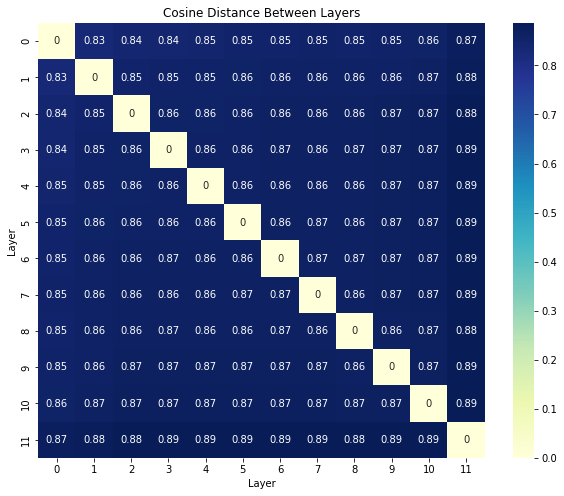

In [ ]:
import numpy as np
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import TFBertModel

# Load pre-trained BERT model
model = TFBertModel.from_pretrained("bert-base-cased")

# Get layer-wise weight distribution
num_layers = model.config.num_hidden_layers
layer_weights_distribution = []
for i in range(num_layers):
    layer = model.bert.encoder.layer[i]
    layer_weights = layer.get_weights()
    layer_weights_flat = np.concatenate([weight.flatten() for weight in layer_weights])
    layer_weights_distribution.append(layer_weights_flat)

# Calculate Cosine distance between all pairs of layers
distances = np.zeros((num_layers, num_layers))
for i in range(num_layers):
    for j in range(num_layers):
        distances[i][j] = cosine(layer_weights_distribution[i], layer_weights_distribution[j])

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(distances, annot=True, cmap="YlGnBu", ax=ax)
ax.set_title("Cosine Distance Between Layers")
ax.set_xlabel("Layer")
ax.set_ylabel("Layer")
plt.show()



In [ ]:
!pip install --upgrade transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import BertConfig

config = BertConfig.from_pretrained('bert-base-cased')
num_hidden_sizes = config.hidden_size

print("Number of hidden sizes in bert-base-cased:", num_hidden_sizes)


Number of hidden sizes in bert-base-cased: 768


In [ ]:
from transformers import BertConfig, BertModel

# get the BERT-base-cased configuration
config = BertConfig.from_pretrained('bert-base-cased')

# print the original number of hidden sizes
print("Original number of hidden sizes in bert-base-cased:", config.hidden_size)

# set the hidden size to 720
config.hidden_size = 720

# load the modified BERT-base-cased model
model = BertModel(config)

# print the number of hidden sizes in the model
print(f"Number of hidden sizes in modified bert-base-cased: {model.config.hidden_size}")




Original number of hidden sizes in bert-base-cased: 768


In [ ]:
history = learner.fit_onecycle(2e-5, 5)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/5
67/67 [==============================] - 49s 733ms/step - loss: 0.2687 - accuracy: 0.8525 - val_loss: 1.0193 - val_accuracy: 0.7300
Epoch 2/5
67/67 [==============================] - 48s 718ms/step - loss: 0.2839 - accuracy: 0.8400 - val_loss: 1.0111 - val_accuracy: 0.7400
Epoch 3/5
67/67 [==============================] - 49s 724ms/step - loss: 0.2781 - accuracy: 0.8300 - val_loss: 1.0400 - val_accuracy: 0.7200
Epoch 4/5
67/67 [==============================] - 49s 728ms/step - loss: 0.2745 - accuracy: 0.8400 - val_loss: 1.0060 - val_accuracy: 0.7200
Epoch 5/5
67/67 [==============================] - 48s 722ms/step - loss: 0.2640 - accuracy: 0.8500 - val_loss: 1.0034 - val_accuracy: 0.7300


In [ ]:
# Save the new model
model.save('n123_model')

